+-------+--------------------+--------------------+
| Epoch |        dice        |        Hd95        |
+-------+--------------------+--------------------+
|   0   | 0.7158245305374772 | 17.662766246419196 |
|   1   | 0.7829349979438381 | 27.501498468298653 |
|   2   | 0.7051936410867676 | 13.059373241558404 |
|   3   | 0.7796163982123689 | 19.553470043550455 |
|   4   | 0.7944874650199294 | 16.89256458909887  |
|   5   | 0.8117931333579189 | 26.177789849147462 |
|   6   | 0.8011026387292446 | 13.416162080513802 |
|   7   | 0.8041190398719672 | 15.228715807931458 |
|   8   | 0.8133741384405638 | 19.56050358947955  |
|   9   | 0.8156644591467559 | 18.874899852066704 |
+-------+--------------------+--------------------+
+-------+--------------------+--------------------+
| Epoch |        dice        |        Hd95        |
+-------+--------------------+--------------------+
|   0   | 0.8267387748734399 | 11.15360322416874  |
|   1   | 0.8467602855907422 | 11.789187525657189 |
|   2   | 0.

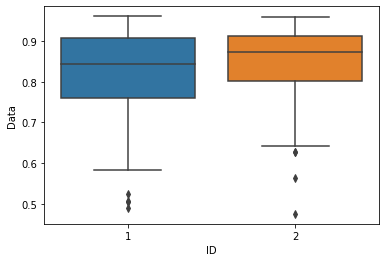

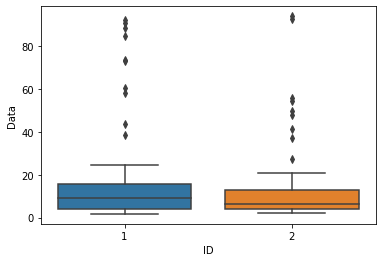

In [34]:
import numpy as np
import os 
import csv
import matplotlib.pyplot as plt
import seaborn as sns

dice = []
hd95 = []

from os import listdir
from os.path import isfile, join

epoch_num = 10
# dice_output = []
# hd95_output = []

dice_box = []
hd95_box = []
in_type = ["RI","PTE"]
for val in in_type:
    dice_output = []
    hd95_output = []
    for epoch in range(epoch_num):
        dice = []
        hd95 = []
        folder_list = []
    #     print(epoch)
        folder_list = [f for f in listdir(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/") if isfile(join(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/", f))]

        # print(folder_list)
        #folder_list = [os.getcwd() + "/Test_outputs/Brats_PTE_D10_C100_E10_0/Epoch_0/Metrics/013_28_1_whimg_norm_154_Metrics.csv"]
        for folder in range(len(folder_list)):
        #     print(folder)
            with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
                reader = csv.DictReader(f)
                for row in reader:
    #                 if folder == 0:
    #                     print(row.keys())
    #                     print("")
                    dice.append(row["dice"])
                    hd95.append(row["hd95"])

        dice = [eval(i) for i in dice]
        hd95 = [eval(i) for i in hd95]

        dice_output.append(np.mean(dice))
        hd95_output.append(np.mean(hd95))
    #     print("Dice", np.mean(dice))
    # #     print("")
    #     print("HD95", np.mean(hd95))

    from prettytable import PrettyTable
    t = PrettyTable(['Epoch','dice', 'Hd95'])
    for a in range(len(hd95_output)):
        t.add_row([a, dice_output[a], hd95_output[a]])
    print(t)
    dice_box.append(dice)
    hd95_box.append(hd95)
# print(dice_box)

df = pd.DataFrame(dice_box).T
df = df.rename(columns={k: f'Data{k+1}' for k in range(len(dice_box))}).reset_index()
df = pd.wide_to_long(df, stubnames = ['Data'], i = 'index', j = 'ID').reset_index()[['ID', 'Data']]
sns.boxplot(x='ID', y = 'Data', data = df)
plt.show()
df = 0
df = pd.DataFrame(hd95_box).T
df = df.rename(columns={k: f'Data{k+1}' for k in range(len(hd95_box))}).reset_index()
df = pd.wide_to_long(df, stubnames = ['Data'], i = 'index', j = 'ID').reset_index()[['ID', 'Data']]
sns.boxplot(x='ID', y = 'Data', data = df)
plt.show()
        

In [ ]:
from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})
for value in ["10","100"]:
    epoch = 0
    show_ones = False
    for train_stage in ["Testing"]:
        percentage_array = [0,1,2,3,4,5,6,7,8,9]
        inputs,inputs2 = ["","","","","","","","","",""],["","","","","","","","","",""]
        pred_type = ["predictions_sigmoid","predictions"]

        for percentage in range(len(percentage_array)):
            inputs[percentage] = "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]
            inputs2[percentage] = "Test_outputs/Brats_PTE_D"+value+"_C100_E10_0/Epoch_" + str(percentage_array[percentage]) + "/" +  "_Dice_predictions.csv"

        title_output_model = ["RI", "PTE"]#, "PTE"]
        col_name = ["Epoch 1","Epoch 2","Epoch 3","Epoch 4","Epoch 5","Epoch 6","Epoch 7","Epoch 8","Epoch 9"]
        
        with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D10_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
            reader = csv.DictReader(f)
        
        train_data_input = pd.DataFrame(data=None, columns=title_output_model)# .astype(int)

        x_array = np.array([])
        y_array = np.array([])
        z_array = np.array([])
        a_array = np.array([])

        index = [0,1,2,3,4,5,6,7,8]#,9]#,5]
        input_test = [inputs, inputs2]#, inputs3]

        for i in range(len(index)):
            x_array = np.array([])
            y_array = np.array([])
            z_array = np.array([])

            x_array = np.genfromtxt(input_test[0][index[i]], delimiter=',',invalid_raise = False)
            x_array = np.ndarray.flatten(x_array)
            if show_ones == True:
                x_array[x_array == 1] = np.nan

            y_array = np.genfromtxt(input_test[1][index[i]], delimiter=',',invalid_raise = False)
            y_array = np.ndarray.flatten(y_array)
            if show_ones == True:
                y_array[y_array == 1] = np.nan

            df1 = pd.DataFrame(data = {"Division":np.full(len(x_array), col_name[index[i]]),
                                       "RI":x_array,"PTE":y_array})#,"PTE":z_array})
            train_data_input = train_data_input.append(df1,ignore_index=True)

        data = train_data_input.melt('Division', var_name='Model Pre-training level', value_name='Mean Dice')
        fig = plt.figure(figsize=(10,5))
        plt.grid()
        ax=sns.boxplot(y='Mean Dice', x='Division', hue='Model Pre-training level', data=data)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        plt.title("Mean "+train_stage+" Dice score with pretraining. Grouped by epoch \nfor "+value+"% dataset used for training."
                 ,fontsize=20)
        plt.ylim(-0.05,1.05)
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.xaxis.grid(True, which='minor', color='black', lw=1)
        plt.xlabel("",fontsize=18)
        plt.ylabel("Mean Volume Dice Score",fontsize=18)
        plt.show()

+-------+--------------------+--------------------+
| Epoch |      RI dice       |      PTE dice      |
+-------+--------------------+--------------------+
|   0   | 0.7158245305374772 | 0.8267387748734399 |
|   1   | 0.7829349979438381 | 0.8467602855907422 |
|   2   | 0.7051936410867676 | 0.8213036496589172 |
|   3   | 0.7796163982123689 | 0.8384125603343704 |
|   4   | 0.7944874650199294 | 0.8325614035866554 |
|   5   | 0.8117931333579189 | 0.8368170800686368 |
|   6   | 0.8011026387292446 | 0.8457583886370084 |
|   7   | 0.8041190398719672 | 0.8445293405384181 |
|   8   | 0.8133741384405638 | 0.8510366865445217 |
|   9   | 0.8156644591467559 | 0.8426119936102403 |
+-------+--------------------+--------------------+


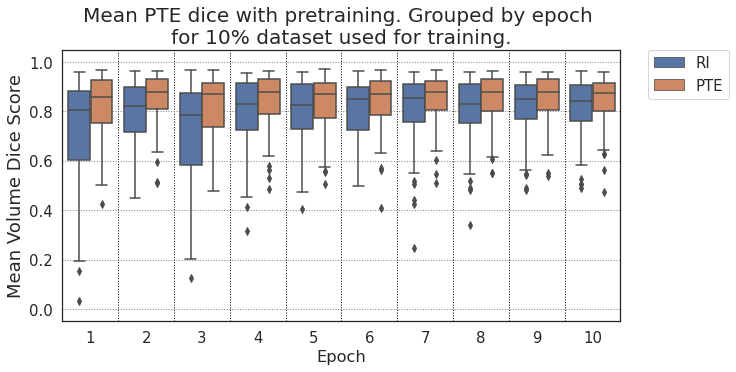

+-------+--------------------+--------------------+
| Epoch |      RI hd95       |      PTE hd95      |
+-------+--------------------+--------------------+
|   0   | 17.662766246419196 | 11.15360322416874  |
|   1   | 27.501498468298653 | 11.789187525657189 |
|   2   | 13.059373241558404 |  9.35582279573407  |
|   3   | 19.553470043550455 | 9.312955375303302  |
|   4   | 16.89256458909887  | 11.226861787260615 |
|   5   | 26.177789849147462 | 16.850105071486084 |
|   6   | 13.416162080513802 | 17.03499424792172  |
|   7   | 15.228715807931458 | 11.02981874859123  |
|   8   | 19.56050358947955  | 11.713587186629308 |
|   9   | 18.874899852066704 | 14.357995837613151 |
+-------+--------------------+--------------------+


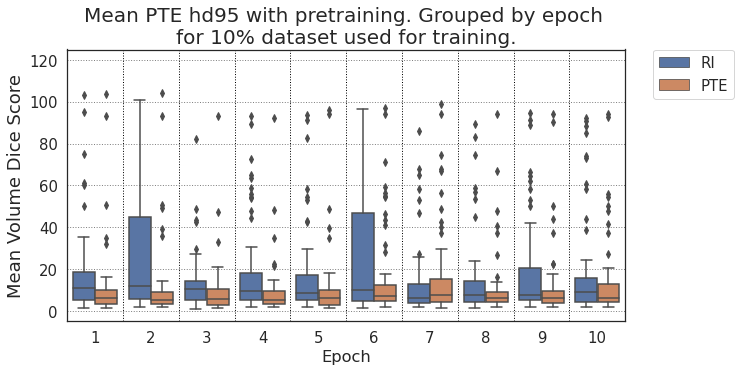

+-------+--------------------+--------------------+
| Epoch |    RI precision    |   PTE precision    |
+-------+--------------------+--------------------+
|   0   | 0.9458341059708274 | 0.933803641219312  |
|   1   | 0.8815215895087485 | 0.9066639533149073 |
|   2   | 0.9696812883458348 | 0.9432727097309909 |
|   3   | 0.9054321002991701 | 0.9135481724890311 |
|   4   | 0.9159324019257381 | 0.9333055304997958 |
|   5   | 0.8796299740530928 | 0.8969804024613556 |
|   6   | 0.9350269532337155 | 0.8937445246578247 |
|   7   | 0.9272292656484244 | 0.9055766716263864 |
|   8   | 0.9073786805727933 | 0.9059864544692592 |
|   9   | 0.9123228342403471 | 0.8962364056505913 |
+-------+--------------------+--------------------+


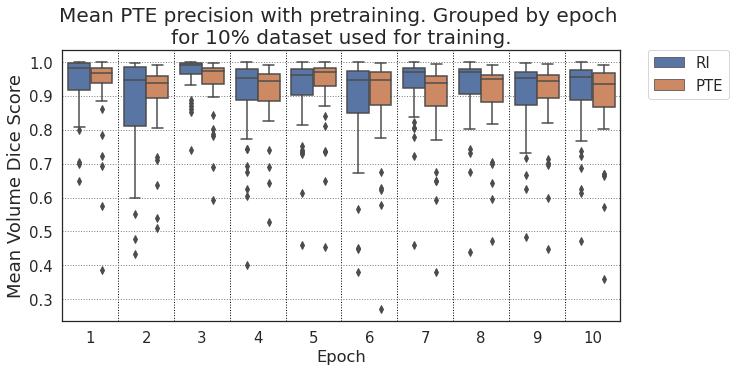

+-------+--------------------+--------------------+
| Epoch |     RI recall      |     PTE recall     |
+-------+--------------------+--------------------+
|   0   | 0.6327549430563036 | 0.7637926577472539 |
|   1   | 0.753077332038935  | 0.8140232948817555 |
|   2   | 0.6036717394944843 | 0.7514438340204286 |
|   3   | 0.7313925294200739 | 0.7982465330338651 |
|   4   | 0.740471557786536  | 0.775486695204299  |
|   5   | 0.7914740410788239 | 0.8110278932976034 |
|   6   | 0.7362094837750331 | 0.8265940922962208 |
|   7   | 0.7435619243595465 | 0.8132218183587212 |
|   8   | 0.7710335432668206 | 0.8227708932463553 |
|   9   |  0.77102889848881  | 0.8176313918097033 |
+-------+--------------------+--------------------+


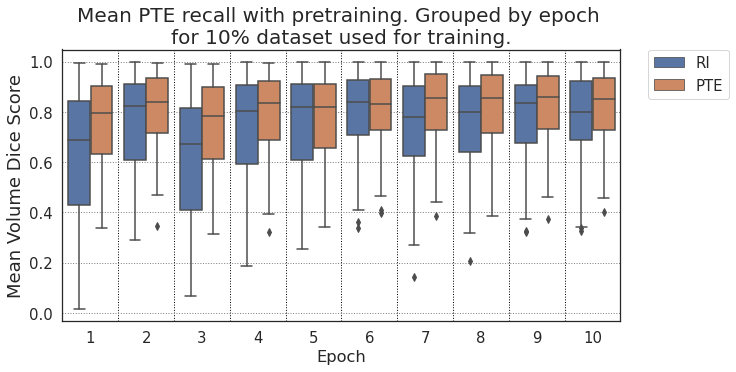


Epoch 3
+-----------+--------------------+--------------------+
|   Metric  |         RI         |        PTE         |
+-----------+--------------------+--------------------+
|    dice   | 0.7796163982123689 | 0.8384125603343704 |
|    hd95   | 19.553470043550455 | 9.312955375303302  |
| precision | 0.9054321002991701 | 0.9135481724890311 |
|   recall  | 0.7313925294200739 | 0.7982465330338651 |
+-----------+--------------------+--------------------+

####################################################################################################
####################################################################################################
####################################################################################################
+-------+--------------------+--------------------+
| Epoch |      RI dice       |      PTE dice      |
+-------+--------------------+--------------------+
|   0   | 0.8653681604274593 | 0.8793236367550967 |
|   1   | 0.8704436740947268 | 

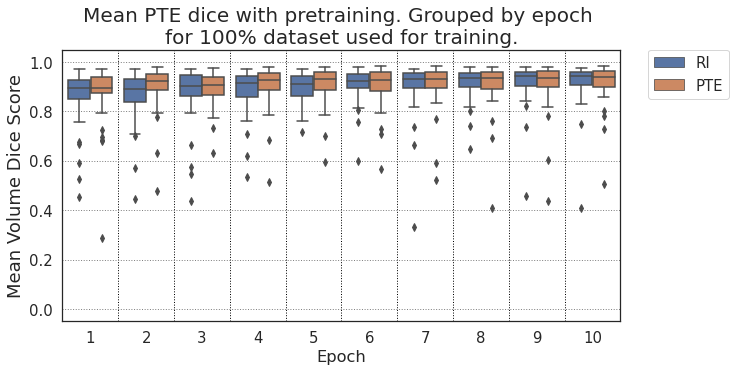

+-------+--------------------+--------------------+
| Epoch |      RI hd95       |      PTE hd95      |
+-------+--------------------+--------------------+
|   0   | 17.791272706734496 | 6.449880609177707  |
|   1   | 15.591745752200733 | 7.1938821022970565 |
|   2   | 5.156119076829206  | 5.695165159409506  |
|   3   | 5.451310657618339  | 6.078021676498543  |
|   4   | 5.003900438024283  | 5.794003708320751  |
|   5   | 6.133878954251606  | 4.344289817308125  |
|   6   | 4.848864503074105  | 6.366815922971357  |
|   7   | 4.078387806290074  | 4.813774417157758  |
|   8   | 4.0312998365937505 | 5.9310224110620045 |
|   9   | 3.4692955880834138 | 5.623851075925325  |
+-------+--------------------+--------------------+


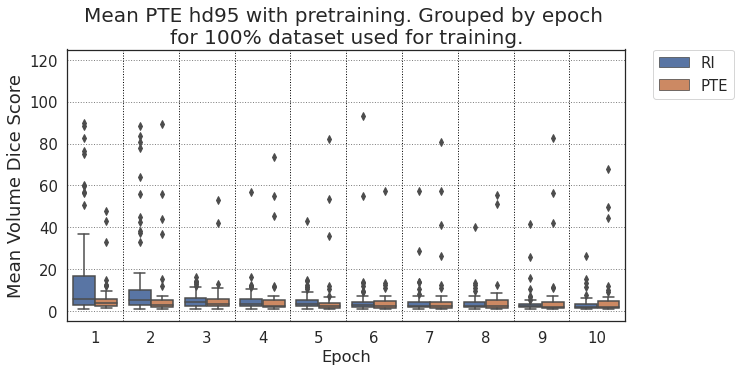

+-------+--------------------+--------------------+
| Epoch |    RI precision    |   PTE precision    |
+-------+--------------------+--------------------+
|   0   | 0.8964944876569749 | 0.939596112304417  |
|   1   | 0.915213710435776  | 0.9342885632933359 |
|   2   | 0.9609995695285416 | 0.9626764435234966 |
|   3   | 0.9660723386315135 | 0.9460328110441353 |
|   4   | 0.9640979527957786 | 0.9423510287769372 |
|   5   | 0.9485410847548937 | 0.9600796957638011 |
|   6   | 0.9448551706552513 | 0.9425567346039131 |
|   7   | 0.953180867008542  | 0.9543748711848871 |
|   8   | 0.9343217775666012 | 0.9414430868184237 |
|   9   | 0.9406144528926589 | 0.9489871486422542 |
+-------+--------------------+--------------------+


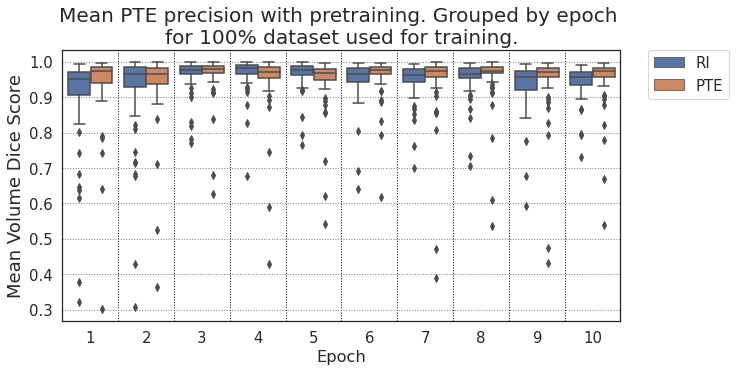

+-------+--------------------+--------------------+
| Epoch |     RI recall      |     PTE recall     |
+-------+--------------------+--------------------+
|   0   | 0.8536538389722536 | 0.8340195163103556 |
|   1   | 0.8470284557640848 | 0.8805311363216114 |
|   2   | 0.8273620990780465 | 0.8323201673399445 |
|   3   | 0.8343943940839628 | 0.8798438646775213 |
|   4   | 0.8431438053902176 |  0.89165831908809  |
|   5   | 0.8828328984827288 | 0.8667214850912719 |
|   6   | 0.878492293866482  | 0.8891553564752944 |
|   7   | 0.8813050268462896 | 0.8751963554465775 |
|   8   | 0.9074992295770083 | 0.8920911792324648 |
|   9   | 0.9074188561852465 | 0.8907377798654682 |
+-------+--------------------+--------------------+


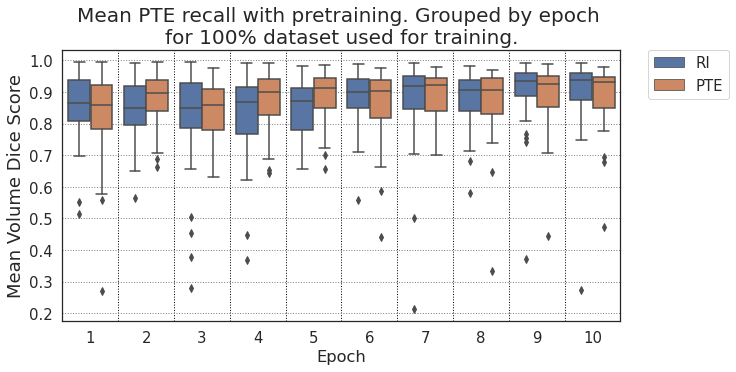


Epoch 3
+-----------+--------------------+--------------------+
|   Metric  |         RI         |        PTE         |
+-----------+--------------------+--------------------+
|    dice   | 0.8893621495798986 | 0.9082729546697634 |
|    hd95   | 5.451310657618339  | 6.078021676498543  |
| precision | 0.9660723386315135 | 0.9460328110441353 |
|   recall  | 0.8343943940839628 | 0.8798438646775213 |
+-----------+--------------------+--------------------+

####################################################################################################
####################################################################################################
####################################################################################################


In [8]:
import numpy as np
import os 
import csv
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

from prettytable import PrettyTable

metric_out = []
hd95 = []

from os import listdir
from os.path import isfile, join

epoch_num = 10
output_epoch = 3
folder_list = [[],[]]
in_type = ["RI","PTE"]
index = range(epoch_num)

# recall = sensitivity

col_name = ["1","2",
            "3","4",
            "5","6",
            "7","8",
            "9","10"]
    
for dataset_size in ["10", "100"]:
    metrics_table = PrettyTable(['Metric','RI', 'PTE'])
    for metric in ["dice","hd95","precision","recall"]:

        x_array = np.array([])
        y_array = np.array([])
        metric_output = []
        
        folder_len = len(listdir(os.getcwd() + "/Test_outputs/Brats_" + in_type[0] + "_D"+dataset_size+"_C100_E10_0/Epoch_"+str(0)+"/Metrics/"))
        
        out_x = np.empty([epoch_num, folder_len])
        out_y = np.empty([epoch_num, folder_len])

        train_data_input = pd.DataFrame(data=None, columns=in_type)

        for val in in_type:
            dice_output = []

            df1 = pd.DataFrame({"RI" : [], "PTE" : []})

            for epoch in range(epoch_num):
                metric_out = []

                x_array = np.array([])
                y_array = np.array([])
                
                folder_list = [f for f in listdir(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/") if isfile(join(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/", f))]
        
                for folder in range(len(folder_list)):

                    with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
                        reader = csv.DictReader(f)
                        for row in reader:
                            metric_out.append(row[metric])

                if val == "RI":
                    x_array = np.append(x_array, metric_out)
                    out_x[epoch] = x_array

                if val == "PTE":
                    y_array = np.append(y_array, metric_out)
                    out_y[epoch] = y_array

                x_array = x_array.astype(np.float)
                y_array = y_array.astype(np.float)

        for var in range(len(out_x)):
            df1 = pd.DataFrame(data = {"Epoch":np.full(len(out_x[var]), col_name[index[var]]),
                                           "RI":out_x[var],"PTE":out_y[var]})#,"PTE":z_array})

            train_data_input = train_data_input.append(df1,ignore_index=True)
            
            t = PrettyTable(['Epoch',"RI " + metric, "PTE " + metric])
            for a in range(10):
                t.add_row([a, np.mean(out_x[a]), np.mean(out_y[a])])
        metrics_table.add_row([metric, np.mean(out_x[output_epoch]), np.mean(out_y[output_epoch])])
        print(t)
        metric_out = []
        x_array = np.array([])
        y_array = np.array([])


        data = train_data_input.melt('Epoch', var_name='Model Pre-training level', value_name='Mean Dice')
        fig = plt.figure(figsize=(10,5))
        plt.grid()
        ax=sns.boxplot(y='Mean Dice', x='Epoch', hue='Model Pre-training level', data=data)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        plt.title("Mean " + val + " " + metric + " with pretraining. Grouped by epoch \nfor "+dataset_size+"% dataset used for training."
                 ,fontsize=20)
        if metric == "dice":
            plt.ylim(-0.05,1.05)
        if metric == "hd95":
            plt.ylim(-5,125)
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.xaxis.grid(True, which='minor', color='black', lw=1)
        plt.ylabel("Mean Volume Dice Score",fontsize=18)
        plt.show()
    print("")
    print("Epoch " + str(output_epoch))
    print(metrics_table)
    print("")
    print("####################################################################################################")
    print("####################################################################################################")
    print("####################################################################################################")


+-------+--------------------+--------------------+
| Epoch |      RI dice       |      PTE dice      |
+-------+--------------------+--------------------+
|   0   | 0.8653681604274593 | 0.8793236367550967 |
|   1   | 0.8704436740947268 | 0.9025359982094391 |
|   2   | 0.8802075583679455 | 0.889225896512772  |
|   3   | 0.8893621495798986 | 0.9082729546697634 |
|   4   | 0.8966006154905101 | 0.9137360794938589 |
|   5   | 0.9124046691520028 | 0.9074977704445827 |
|   6   | 0.9050157718348392 | 0.9109520657225211 |
|   7   | 0.9135354248843205 | 0.9105792791510295 |
|   8   | 0.9186572118873301 | 0.9133873188412327 |
|   9   | 0.9202439365811478 | 0.916878437170899  |
+-------+--------------------+--------------------+


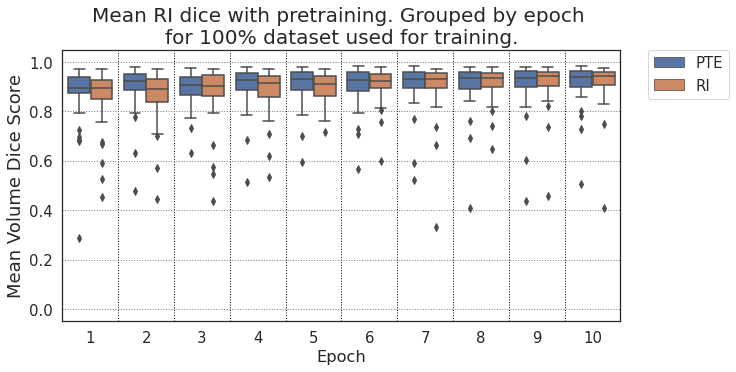

+-------+--------------------+--------------------+
| Epoch |      RI hd95       |      PTE hd95      |
+-------+--------------------+--------------------+
|   0   | 17.791272706734496 | 6.449880609177707  |
|   1   | 15.591745752200733 | 7.1938821022970565 |
|   2   | 5.156119076829206  | 5.695165159409506  |
|   3   | 5.451310657618339  | 6.078021676498543  |
|   4   | 5.003900438024283  | 5.794003708320751  |
|   5   | 6.133878954251606  | 4.344289817308125  |
|   6   | 4.848864503074105  | 6.366815922971357  |
|   7   | 4.078387806290074  | 4.813774417157758  |
|   8   | 4.0312998365937505 | 5.9310224110620045 |
|   9   | 3.4692955880834138 | 5.623851075925325  |
+-------+--------------------+--------------------+


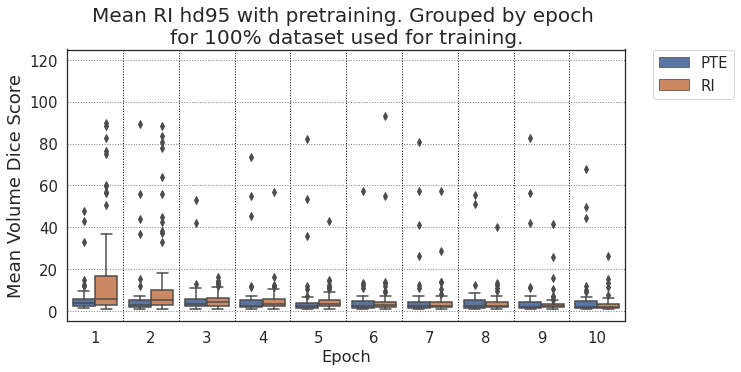

+-------+--------------------+--------------------+
| Epoch |    RI precision    |   PTE precision    |
+-------+--------------------+--------------------+
|   0   | 0.8964944876569749 | 0.939596112304417  |
|   1   | 0.915213710435776  | 0.9342885632933359 |
|   2   | 0.9609995695285416 | 0.9626764435234966 |
|   3   | 0.9660723386315135 | 0.9460328110441353 |
|   4   | 0.9640979527957786 | 0.9423510287769372 |
|   5   | 0.9485410847548937 | 0.9600796957638011 |
|   6   | 0.9448551706552513 | 0.9425567346039131 |
|   7   | 0.953180867008542  | 0.9543748711848871 |
|   8   | 0.9343217775666012 | 0.9414430868184237 |
|   9   | 0.9406144528926589 | 0.9489871486422542 |
+-------+--------------------+--------------------+


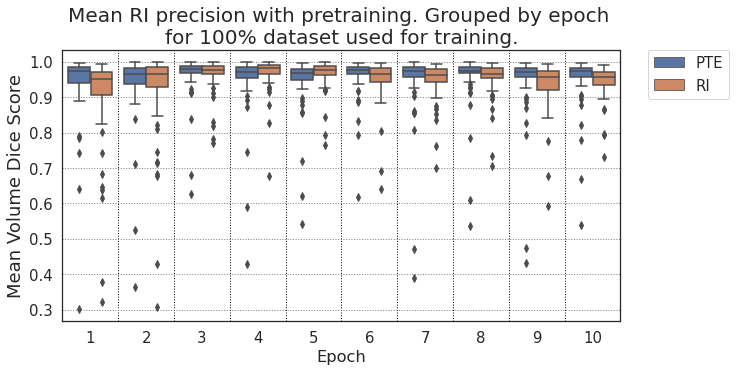

+-------+--------------------+--------------------+
| Epoch |     RI recall      |     PTE recall     |
+-------+--------------------+--------------------+
|   0   | 0.8536538389722536 | 0.8340195163103556 |
|   1   | 0.8470284557640848 | 0.8805311363216114 |
|   2   | 0.8273620990780465 | 0.8323201673399445 |
|   3   | 0.8343943940839628 | 0.8798438646775213 |
|   4   | 0.8431438053902176 |  0.89165831908809  |
|   5   | 0.8828328984827288 | 0.8667214850912719 |
|   6   | 0.878492293866482  | 0.8891553564752944 |
|   7   | 0.8813050268462896 | 0.8751963554465775 |
|   8   | 0.9074992295770083 | 0.8920911792324648 |
|   9   | 0.9074188561852465 | 0.8907377798654682 |
+-------+--------------------+--------------------+


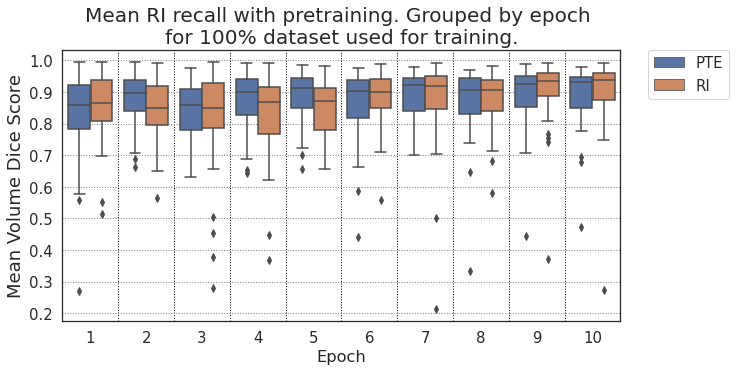

+-------+--------------------+--------------------+
| Epoch |   RI specificity   |  PTE specificity   |
+-------+--------------------+--------------------+
|   0   | 0.9900000000000001 | 0.9995162253506181 |
|   1   | 0.9900000000000001 | 0.9994427002055647 |
|   2   | 0.9900000000000001 | 0.999724740568001  |
|   3   | 0.9900000000000001 | 0.9995589922621952 |
|   4   | 0.9900000000000001 | 0.9994973935085595 |
|   5   | 0.9900000000000001 | 0.9996378068974365 |
|   6   | 0.9900000000000001 | 0.9994989138773209 |
|   7   | 0.9900000000000001 | 0.9996257675082317 |
|   8   | 0.9900000000000001 | 0.9994895533095349 |
|   9   | 0.9900000000000001 | 0.999568130624983  |
+-------+--------------------+--------------------+


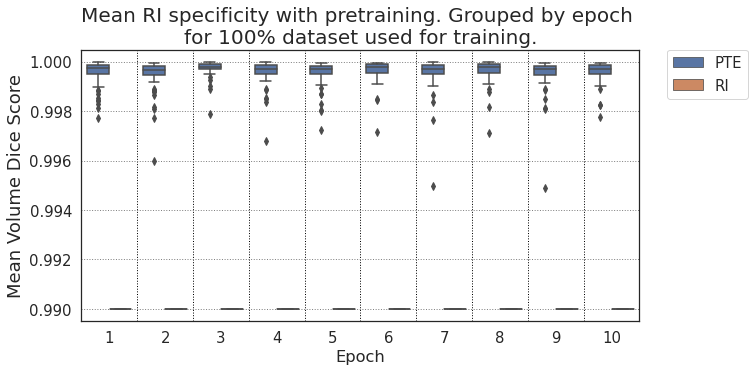


Epoch 3
+-------------+--------------------+--------------------+
|    Metric   |         RI         |        PTE         |
+-------------+--------------------+--------------------+
|     dice    | 0.8893621495798986 | 0.9082729546697634 |
|     hd95    | 5.451310657618339  | 6.078021676498543  |
|  precision  | 0.9660723386315135 | 0.9460328110441353 |
|    recall   | 0.8343943940839628 | 0.8798438646775213 |
| specificity | 0.9900000000000001 | 0.9995589922621952 |
+-------------+--------------------+--------------------+

####################################################################################################
####################################################################################################
####################################################################################################


In [10]:
import numpy as np
import os 
import csv
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import MultipleLocator
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv  

from prettytable import PrettyTable

metric_out = []
hd95 = []

from os import listdir
from os.path import isfile, join

epoch_num = 10
output_epoch = 3
folder_list = [[],[]]
in_type = ["PTE","RI"]
index = range(epoch_num)

# recall = sensitivity

col_name = ["1","2",
            "3","4",
            "5","6",
            "7","8",
            "9","10"]
    
for dataset_size in ["100"]:
    metrics_table = PrettyTable(['Metric','RI', 'PTE'])
    for metric in ["dice","hd95","precision","recall", "specificity"]:

        x_array = np.array([])
        y_array = np.array([])
        metric_output = []
        
        folder_len = len(listdir(os.getcwd() + "/Test_outputs/Brats_" + in_type[0] + "_D"+dataset_size+"_C100_E10_02/Epoch_"+str(0)+"/Metrics/"))
        
        out_x = np.empty([epoch_num, folder_len])
        out_y = np.empty([epoch_num, folder_len])

        train_data_input = pd.DataFrame(data=None, columns=in_type)

        for val in in_type:
            dice_output = []

            df1 = pd.DataFrame({"RI" : [], "PTE" : []})

            for epoch in range(epoch_num):
                metric_out = []

                x_array = np.array([])
                y_array = np.array([])
                if val == "PTE":
                    folder_list = [f for f in listdir(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_02/Epoch_"+str(epoch)+"/Metrics/") if isfile(join(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_02/Epoch_"+str(epoch)+"/Metrics/", f))]
                else:
                     folder_list = [f for f in listdir(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/") if isfile(join(os.getcwd() + 
                                          "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/", f))]

                for folder in range(len(folder_list)):
                    if val == "PTE":
                        with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_02/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
                            reader = csv.DictReader(f)
                            for row in reader:
                                if metric == "specificity":
                                    tp, tn, fp, fn = row['TP'], row['TN'], row['FP'], row['FN']

                                    specificity = float(tn) / (float(tn) + float(fp))
                                    metric_out.append(specificity)
                                else:

                                    metric_out.append(row[metric])
                    else:
                        with open(os.getcwd() + "/Test_outputs/Brats_"+val+"_D"+dataset_size+"_C100_E10_0/Epoch_"+str(epoch)+"/Metrics/" + folder_list[folder]) as f:
                            reader = csv.DictReader(f)
                            for row in reader:
                                if metric == "specificity":
                                    metric_out.append(0.99)
                                else:
                                    metric_out.append(row[metric])
                if val == "RI":
                    x_array = np.append(x_array, metric_out)
                    out_x[epoch] = x_array

                if val == "PTE":
                    y_array = np.append(y_array, metric_out)
                    out_y[epoch] = y_array

                x_array = x_array.astype(np.float)
                y_array = y_array.astype(np.float)

        for var in range(len(out_x)):
            df1 = pd.DataFrame(data = {"Epoch":np.full(len(out_x[var]), col_name[index[var]]),
                                           "RI":out_x[var],"PTE":out_y[var]})#,"PTE":z_array})

            train_data_input = train_data_input.append(df1,ignore_index=True)
            
            t = PrettyTable(['Epoch',"RI " + metric, "PTE " + metric])
            for a in range(10):
                t.add_row([a, np.mean(out_x[a]), np.mean(out_y[a])])
        metrics_table.add_row([metric, np.mean(out_x[output_epoch]), np.mean(out_y[output_epoch])])
        print(t)
        metric_out = []
        x_array = np.array([])
        y_array = np.array([])


        data = train_data_input.melt('Epoch', var_name='Model Pre-training level', value_name='Mean Dice')
        fig = plt.figure(figsize=(10,5))
        plt.grid()
        ax=sns.boxplot(y='Mean Dice', x='Epoch', hue='Model Pre-training level', data=data)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
        plt.title("Mean " + val + " " + metric + " with pretraining. Grouped by epoch \nfor "+dataset_size+"% dataset used for training."
                 ,fontsize=20)
        if metric == "dice":
            plt.ylim(-0.05,1.05)
        if metric == "hd95":
            plt.ylim(-5,125)
        ax.xaxis.set_minor_locator(MultipleLocator(0.5))
        ax.xaxis.grid(True, which='minor', color='black', lw=1)
        plt.ylabel("Mean Volume Dice Score",fontsize=18)
        plt.show()
    print("")
    print("Epoch " + str(output_epoch))
    print(metrics_table)
    print("")
    print("####################################################################################################")
    print("####################################################################################################")
    print("####################################################################################################")


Regression


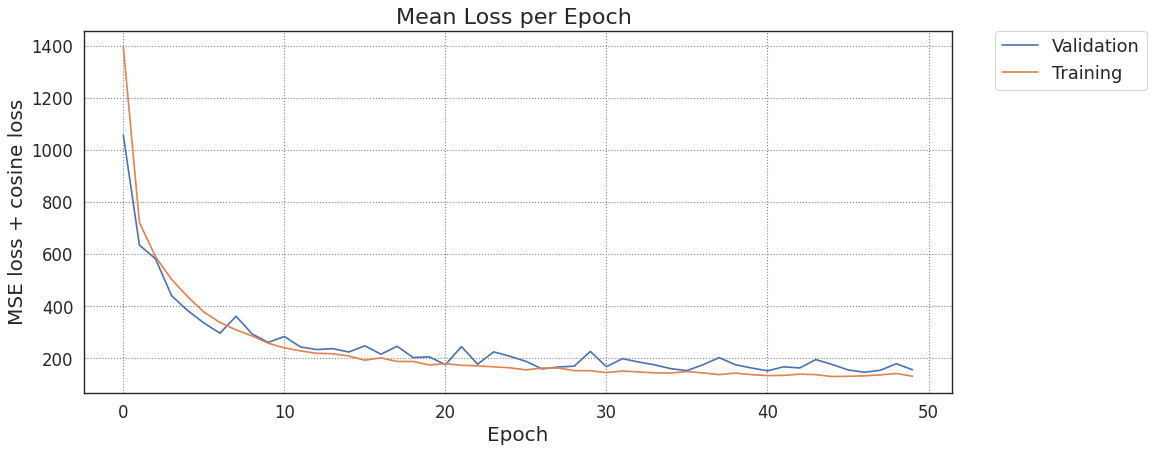

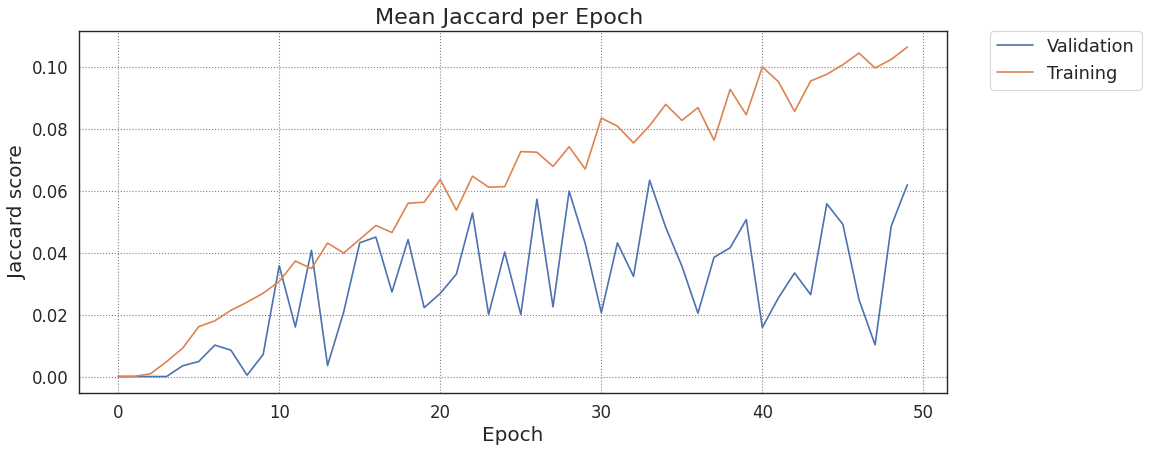

In [9]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 50

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["Prano_pretrain_1_C100"]
legend_names = ["Validation", "Training"]

output_type = ["validation_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Validation_loss","Training_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    
    
# RANO output loss for both training and validation - over differing penalty types

from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["CT_50_c_100_Prano_50_epochs"]
legend_names = ["Validation", "Training"]

output_type = ["validation_jaccard_index","jaccard_index"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Validation_Jaccard","Training_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    #CT_50_c_100_Prano_50_epochs
    
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

Regression


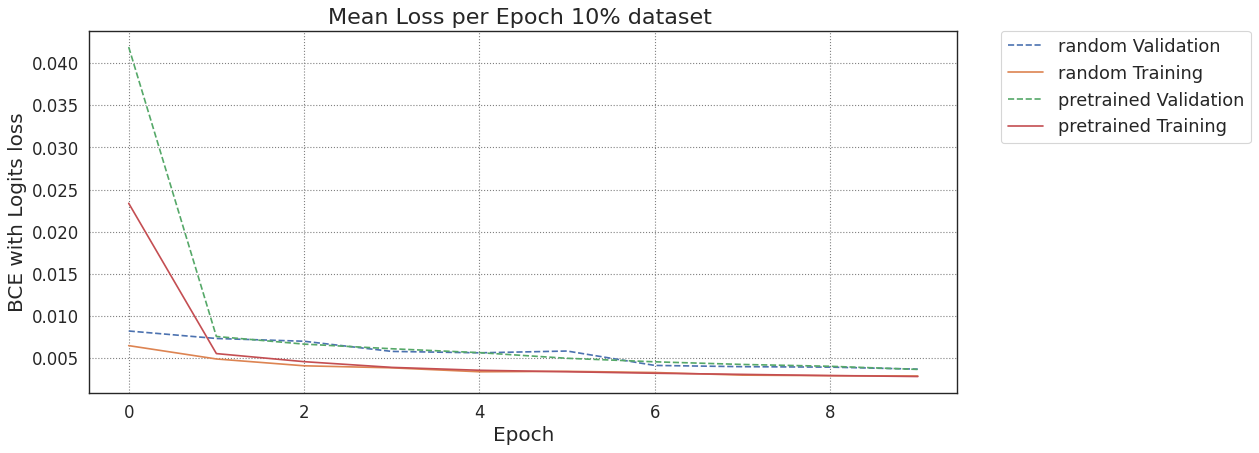

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)


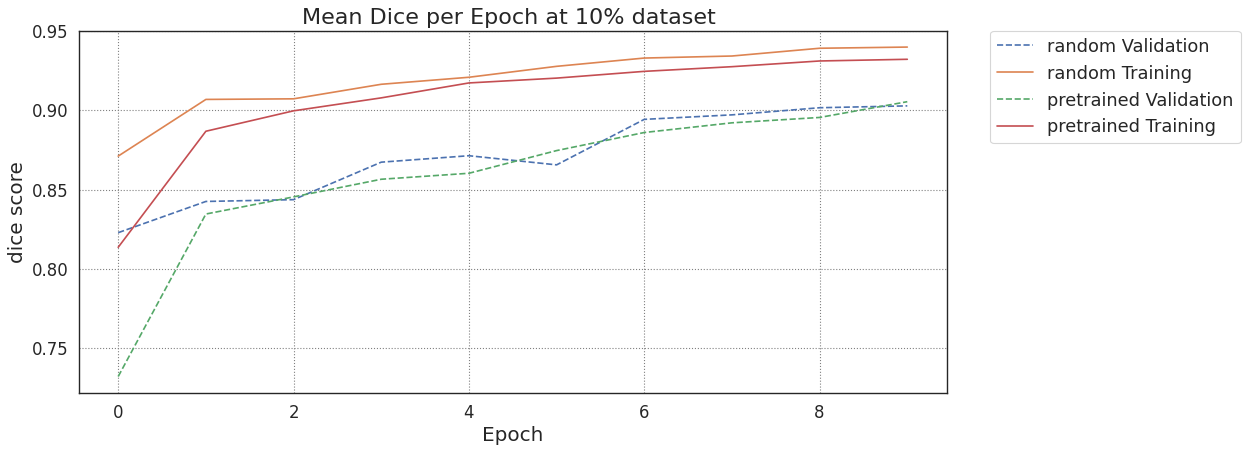

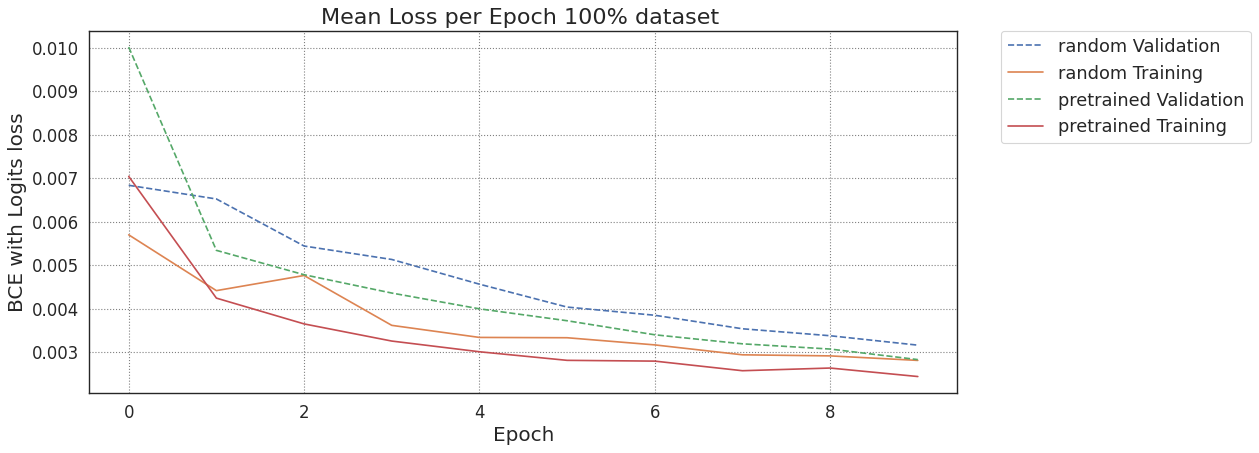

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #553 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #4970 (got 1 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:87: ConversionWarning: Some errors were detected !
    Line #4970 (got 1 columns instead of 8)


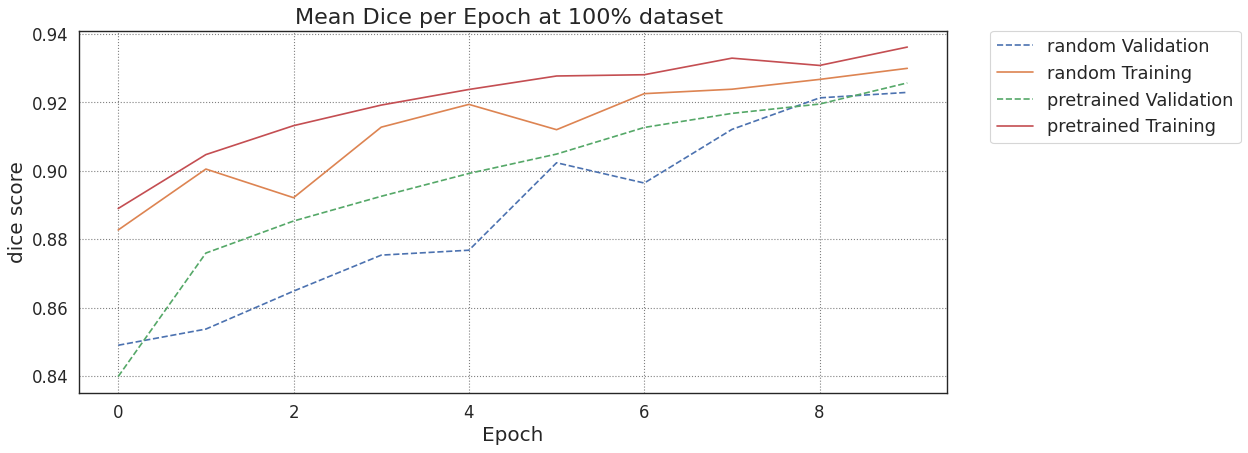

In [29]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 10

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})
# for value in ["randomInit", "pretrained"]
for var in ["10", "100"]:
    input_names = ["Brats_"+var+"_c_100_randomInit_10_epochs","Brats_"+var+"_c_100_pretrained_10_epochs"]
    legend_names = ["random Validation", "random Training", "pretrained Validation", "pretrained Training"]

    output_type = ["validation_loss","training_loss"]
    output_axis = ["BCE with Logits loss"]
    output_title = ["Loss"]
    second_out = ["",""]

    loss_0 = []
    loss_Nan_0 = []
    figure(figsize=(14, 6), dpi=80)
    ax = plt.subplot()
    for c in range(len(output_type)):
        
        for s in range(len(input_names)):
            for i in range(Epochs):

                loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',', invalid_raise = False)
                loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
                if c > (len(output_type) - 3):
                    loss_Nan_0[i] = loss_Nan_0[i]
            if s == 0:
         
                ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
            else:
                ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
            loss_0 = []
            loss_Nan_0 = []

    plt.title("Mean " + output_title[0] + " per Epoch " + var + "% dataset ",fontsize=20)
    ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
    plt.xlabel("Epoch",fontsize=18)
    plt.ylabel(ylabel=output_axis[0],fontsize=18)
    plt.grid()
    plt.show()    

    # RANO output loss for both training and validation - over differing penalty types

    from matplotlib.pyplot import figure
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    sns.set(font_scale = 1.35)
    sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

#     input_names = ["Brats_"+var+"_c_100_randomInit_10_epochs","Brats_"+var+"_c_100_pretrained_10_epochs"]
#     legend_names = ["random Validation", "random Training", "pretrained Validation", "pretrained Training"]

    output_type = ["validation_dice","training_dice"]
    output_axis = ["dice score"]
    output_title = ["Dice"]
    second_out = ["",""]

    loss_0 = []
    loss_Nan_0 = []
    figure(figsize=(14, 6), dpi=80)
    ax = plt.subplot()
    for c in range(len(output_type)):

        #CT_50_c_100_Prano_50_epochs

        for s in range(len(input_names)):
            for i in range(Epochs):
    #             print(i)
    #             print("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv")
    #             loss_0 = []
                loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',', invalid_raise = False)
    #             print(loss_0)
                loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
                if c > (len(output_type) - 3):
                    loss_Nan_0[i] = loss_Nan_0[i]

            if s == 0:
         
                ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
            else:
                ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
            loss_0 = []
            loss_Nan_0 = []

    plt.title("Mean " + output_title[0] + " per Epoch at " + var + "% dataset ",fontsize=20)
    ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
    plt.xlabel("Epoch",fontsize=18)
    plt.ylabel(ylabel=output_axis[0],fontsize=18)
    plt.grid()
    plt.show()  

FileNotFoundError: [Errno 2] No such file or directory: '/data/Test_outputs/CT_RI_D10_C100_E10/Epoch_0/Metrics/'

Regression


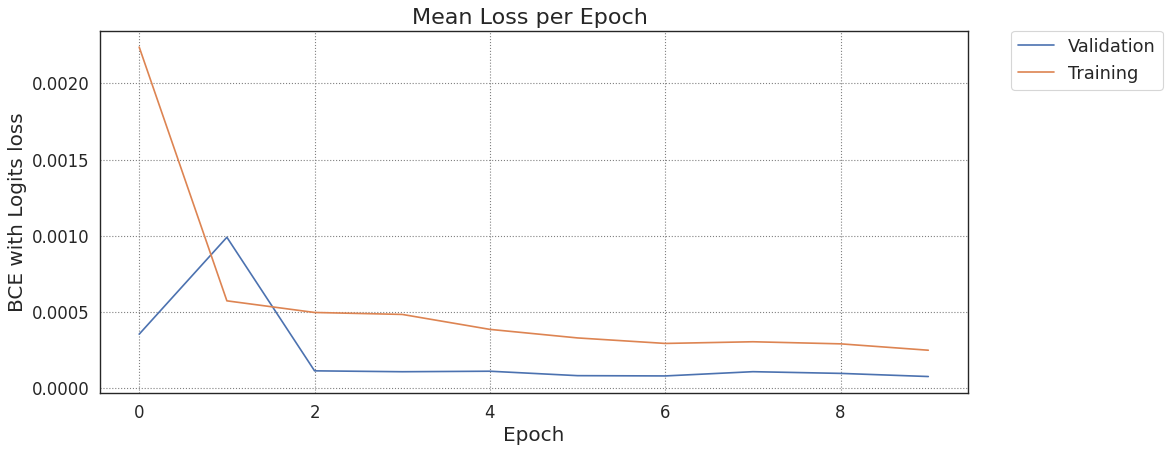

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: ConversionWarning: Some errors were detected !
    Line #221 (got 5 columns instead of 8)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: ConversionWarning: Some errors were detected !
    Line #1986 (got 5 columns instead of 8)


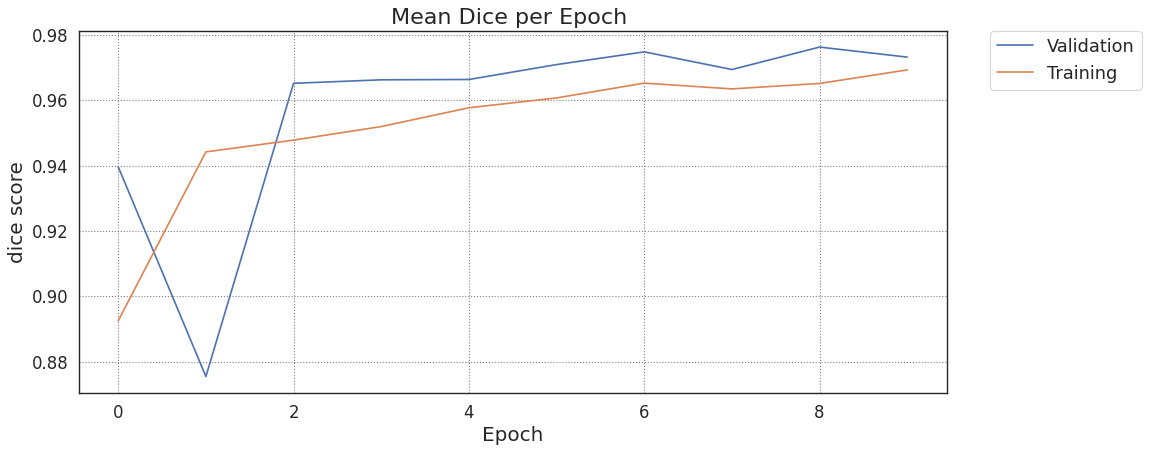

In [16]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 10

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["CT_pretrain_100_c_100_Prano_10_epochs"]
legend_names = ["Validation", "Training"]

output_type = ["validation_loss","training_loss"]
output_axis = ["BCE with Logits loss"]
output_title = ["Loss"]
second_out = ["",""]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    
    
# RANO output loss for both training and validation - over differing penalty types

from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["CT_pretrain_100_c_100_Prano_10_epochs"]
legend_names = ["Validation", "Training"]

output_type = ["validation_dice","training_dice"]
output_axis = ["dice score"]
output_title = ["Dice"]
second_out = ["",""]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):

    #CT_50_c_100_Prano_50_epochs
    
    for s in range(len(input_names)):
        for i in range(Epochs):
#             print(i)
#             print("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv")
#             loss_0 = []
            loss_0 = np.genfromtxt("Checkpoints/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',', invalid_raise = False)
#             print(loss_0)
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

Regression
training_loss
0
cosine_0_epochs_100_brats_4_v0
0
cosine_100_epochs_100_brats_4_v0
1
training_loss
1
cosine_0_epochs_100_brats_4_v0
0
cosine_100_epochs_100_brats_4_v0
1


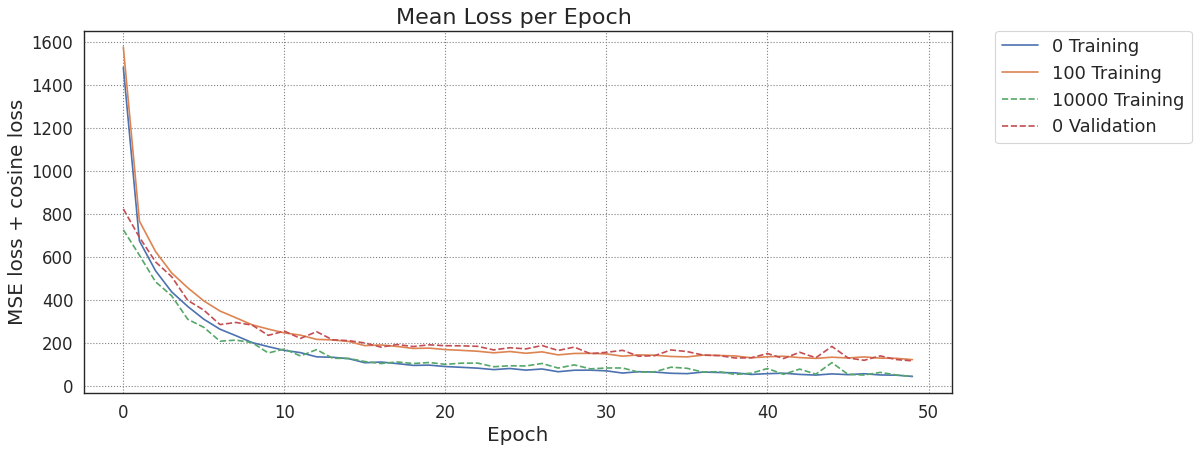

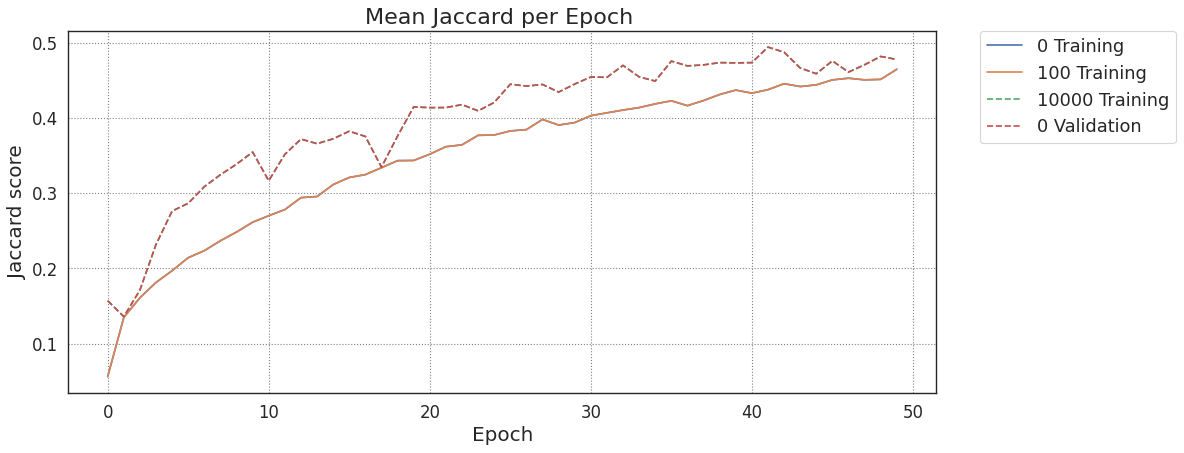

In [6]:
# sort out loss plots for training and validation here with 
# the new file format (will make it easier to transfer the 
# plots to the CT examples when we do this!)

# RANO output loss for both training and validation - over differing penalty types
print("Regression")
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Epochs = 50

sns.set(font_scale = 1.35)
sns.set_style("white",{"grid.color": ".5", "grid.linestyle": ":"})

input_names = ["cosine_0_epochs_100_brats_4_v0","cosine_100_epochs_100_brats_4_v0"]
# input_names = ["Prano_pretrain_1_C100"]
# input_names = ["brats_regress_100_c_10000_Prano_100_epochs"]
#
legend_names = ["0 Training","100 Training" , "10000 Training", "0 Validation", "100 Validation", "10000 Validation"]

output_type = ["training_loss","training_loss"]
output_axis = ["MSE loss + cosine loss"]
output_title = ["Loss"]
second_out = ["Training_loss","Validation_loss"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    print(output_type[c])
    print(c)
    for s in range(len(input_names)):
        print(input_names[s])
        print(s)
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()    

output_type = ["training_loss","training_loss"]
output_axis = ["Jaccard score"]
output_title = ["Jaccard"]
second_out = ["Training_Jaccard","Validation_Jaccard"]

loss_0 = []
loss_Nan_0 = []
figure(figsize=(14, 6), dpi=80)
ax = plt.subplot()
for c in range(len(output_type)):
    for s in range(len(input_names)):
        for i in range(Epochs):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/Checkpoints/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        if c == 1:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0,linestyle='dashed')
        if c == 0:
            ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

plt.title("Mean " + output_title[0] + " per Epoch ",fontsize=20)
ax.legend(legend_names, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=16)
plt.xlabel("Epoch",fontsize=18)
plt.ylabel(ylabel=output_axis[0],fontsize=18)
plt.grid()
plt.show()  

# for some reasont eh values of jaccard for 0 and 10000 are the same, not sure why this is the case but will redo some training to find out,
# also not saving the hyperparameters for rano so need to fix that

In [7]:
# T1, Flair, T1ce, T2

(512, 512)
0.8737698657501248 1.0


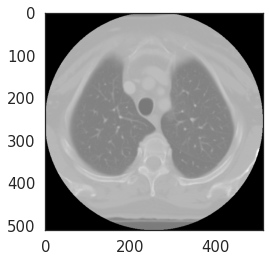

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im_frame = Image.open('Datasets/DeepLesion/minideeplesion/000001_01_01/105.png')

print(np.shape(im_frame))
im_frame = im_frame/(np.max(im_frame))
print(np.min(im_frame), np.max(im_frame))
plt.imshow(im_frame,"gray")
plt.show()

In [4]:
%run "Code_UNet_2/Preprocessing/Bounding_box.py"

/data/Datasets/Brats_2018_4/labelsTr/


  0%|          | 0/44175 [00:00<?, ?it/s]

[[139.  95. 146. 102.]
 [  0.   0.   0.   0.]
 [ 57.  98. 102. 178.]
 ...
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [ 96. 107. 120. 137.]]


[0, 0, 0, 0]
0.0 1.0


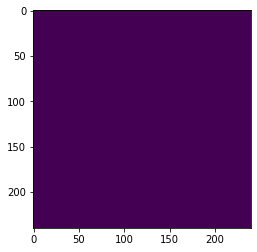

In [2]:
from Code_UNet_2.Code_UNet_Re.Net_modules.Evaluation import Jaccard_Evaluation as Jacc
import matplotlib.pyplot as plt
# bounding_box = [139,  95, 146, 102]
bounding_box = [0,  0, 0, 0]
Jacc.BBox(bounding_box)

plt.show()